# Introduction to the Impresso Python Library

<a target="_blank" href="https://colab.research.google.com/github/impresso/impresso-datalab-notebooks/blob/main/starter/basics_ImpressoAPI.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## What is this notebook about?

This notebook provides a quick introduction to the Impresso Python library, a module designed to interact with the Impresso Public API. It is an ideal starting point for users looking to explore the Impresso corpus, its metadata, and the associated semantic enrichments. 

To access the data, you will need an Impresso account. If you do not have one yet, you can create it on the [Impresso Datalab Website](https://impresso-project.ch/datalab/).

## What will you learn?

In this notebook, you will learn how to:

- Instantiate the client and authenticate with the Impresso API;
- Search for content items (such as news articles) within the Impresso corpus;
- Work with facets to filter data by language, data provider, etc.;
- Retrieve semantic enrichments such as named entities and instances of text reuse;
- Use Jupyter’s auto-assist features for exploring documentation;
- Understand the main capabilities provided by Impresso python library;
- Work with user-generated collections. 


This notebook will guide you through these core functionalities and help you get familiar with the Impresso python library capabilities.

## Recommended resources

If you need a gentle introduction to the Python programming language, you can check: 

- [Chapter 3: Programming concepts of data analysis](https://cssbook.net/content/chapter03.html) of the book [Computational Analysis of Communication](https://cssbook.net/) by Van Atteveldt, Trilling & Calderón (2022). 
- Python crash course [one](https://github.com/ieg-dhr/NLP-Course4Humanities_2024/blob/main/Python_CrashCourse_1.ipynb) and [two](https://github.com/ieg-dhr/NLP-Course4Humanities_2024/blob/main/Python_CrashCourse_2.ipynb). Created by [Sarah Oberbichler](https://orcid.org/0000-0002-1031-2759).


## Prerequisites

Run the following cell to install the `impresso` python library. You may need to restart the kernel to use updated packages. To do so, on Google Colab, go to *Runtime* and select *Restart session*.

In [ ]:
%pip install -q impresso

## Initialising an Impresso Client

By running the following cell, we create an instance of the Impresso client and authenticate it with the Impresso API.

> The `impresso` variable stores an instance of `ImpressoClient`, which establishes a connection to the API using your authentication token. With this object, you can interact with the API to perform operations such as searching for content items, retrieving entities, and fetching facets.

The following command will prompt you to enter your Impresso token if it has not been authenticated recently (it expires after 8 hours).

To get access to an Impresso API token, go to [Impresso Datalab](https://impresso-project.ch/datalab/) and select *Get API Token* on the menu.

In [ ]:
from impresso import connect

impresso_session = connect()

## Making a first request

Let’s start by making a simple request to the Impresso API.

We will search for content items that contain the word **Titanic** and order the results by date in ascending order.

> In Impresso, a **Content Item** is the smallest unit of editorial content within a newspaper or radio collection. This can be an article (for newspapers) or a radio show or episode (for radio programs). Content items can also vary by type, including articles, advertisements, tables, images, and more. Please note that when a newspaper does not have segmentation (OLR) content items for this title correspond to pages.



In [ ]:
search_results = impresso_session.search.find(
    term="Titanic",
    order_by="-date",
)
search_results

The result of the search request to the API is displayed as a notebook-friendly preview when running in a Jupyter notebook.

This preview includes:

- The total number of results (items)
- The number of results on the current search result page
- A link to view the search results in the Impresso Web App
- A table showing a preview of the data as a Pandas DataFrame (only the first 3 items are displayed).

The object returned by a `search` request (here the `search_results`variable) offers multiple ways to access the data:

- df: returns the result as a Pandas DataFrame
- raw: returns the result as a Python list of dictionaries (the raw JSON response from the API)
- data: returns the result as a list of Pydantic objects

For instance, you can explore the results as a Pandas DataFrame with the following command:

In [ ]:
# Replace '5' with the number of results you want to visualise
search_results.df[:5]

## Impresso Python Library Function's Documentation

Methods of the Impresso Library are documented in the [library code base](https://github.com/impresso/impresso-py) and use Python [type hints](https://docs.python.org/3/library/typing.html) to help understanding their expected arguments. The hints are often shown on mouse hover, pressing tab, Ctrl+Space or other IDE (Integrated Development Environment) specific shortcuts. Alternatively, you can run ```help(impresso.search.find)```.

This is what function documentation looks like in Google Colab:

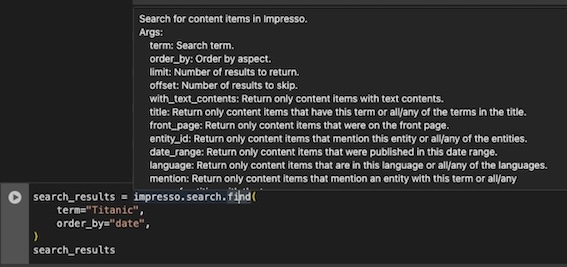

Type hints in Google Colab: 

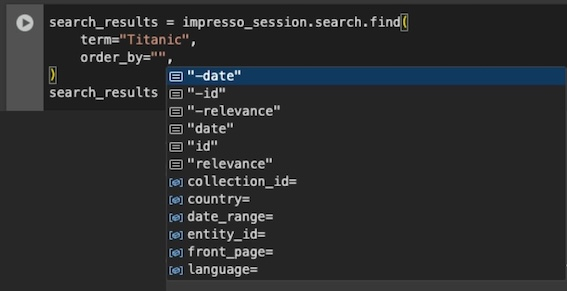

## Namespaces of the Impresso Python Library

The Impresso Python Library is organised into several namespaces, which roughly correspond to the sections of the Impresso App.     
Each namespace typically includes a `find` method to search for a list of items, and/or a `get` method to retrieve a specific item by its ID.

Current namespaces includes:
- `content_items`, to interact with content items 
- `newspapers`, to interact with newspapers
- `entities`, to interact with entities and mentions annotated in the Impresso Corpus
- `collections`, to interact with user's own collections
- `text_reuse`, to interact with text reuse data, i.e. clusters and passages

We used `find` above to search for 'titanic'. Let's look at `get` now:

### Namespace for Content Items

The `content_items.get` method can be used to retrieve a content item by its ID.

In [ ]:
content_item = impresso_session.content_items.get("indeplux-1909-04-10-a-i0042")
content_item

### Namespace for Media Sources

This namespace allows to interact with information on media sources (newspaper titles) that compose the Impresso Corpus. 
- By using the dash (-) before *lastIssue*, you are sorting results in descending order

- *limit* determines how many results you will get as output

In [ ]:
# get a single newspaper with the most recent publication year
newspaper = impresso_session.media_sources.find(limit=1, order_by="-lastIssue")
newspaper

### Namespace for Entities

This namespace enables searching and retrieving named entities recognized in the corpus, along with details such as their name, type, the number of items they appear in, their mention count, and related Wikidata information.

> For more information on Impresso named entities check the project [FAQ](https://impresso-project.ch/app/faq#what-is-nep).

In [ ]:
entity_titanic = impresso_session.entities.find("Titanic")
entity_titanic

In [ ]:
# Try 'entities.get()' to get results for ID

entity_titanic = impresso_session.entities.get("aida-0001-50-RMS_Titanic")
entity_titanic

### Namespace for Collections

This namespace allows to interact with one's own collection, i.e. retrieving the collections built in the Impresso Web App, creating a collection from a Impresso API search, and more.

In [ ]:
# By running this cell, you can find collections you have created (results ordered by size in descending order):
result = impresso_session.collections.find(order_by="-size")

# If no collections are found, print 'No collections found'
if result.size == 0:
    "No collections found"

# If collections are found, print number of collections, how many itens the first (biggest) collection contains, and the first item of the first collection

else:
    print("%s collections found" % result.size)
    first_collection_id = result.df.index[0]
    print("First collection contains %i items" % result.df["totalItems"].iloc[0])
    
    first_collection_items = impresso_session.search.find(collection_id=first_collection_id)
    print(
        "Got first %i items in the collection. The first item is: %s" % \
        (first_collection_items.size, first_collection_items.df["title"].iloc[0])
    )


In [ ]:
# Find an article and add it to the collection
titanic_search_result = impresso_session.search.find(term="Titanic", limit=1)
titanic_search_first_item_id = titanic_search_result.df.index[0]
print("Adding article %s to the collection" % titanic_search_first_item_id)

impresso_session.collections.add_items(first_collection_id, [titanic_search_first_item_id])
print("Added article to collection")

In [ ]:
 # Then remove the first article from the collection
first_article_id = first_collection_items.df.index[0]
impresso_session.collections.remove_items(first_collection_id, [first_article_id])
print("Removed article %s from collection" % first_article_id)

### Namespace for Text Reuse

This namespace allows exploration of text reuse data computed on the Impresso Corpus, a process that included identifying and grouping text passages reused across different content items into clusters.
> For more information on Text Reuse in Impresso, check out the paper [impresso Text Reuse at Scale. An interface for the exploration of text reuse data in semantically enriched historical newspapers](https://www.frontiersin.org/journals/big-data/articles/10.3389/fdata.2023.1249469/full)

Let's have a look at text reuse passages on the film Titanic. We search for content items mentioning the word 'Titanic' and the entity 'James Cameron'. We use date filters to see only texts published within two years of the film release. 

You can visualise the output on Impresso Web App by clicking on 'See this result in the Impresso App'. On the app, sort results by 'Cluster Size (Largest first)'.

In [ ]:
# Get 5 text reuse clusters.
# The clusters are ordered by the number of passages they contain (descending).
from impresso import AND, OR, DateRange

clusters = impresso_session.text_reuse.clusters.find(
    term="titanic",
    limit=5,
    mention= "James Cameron",
    date_range=DateRange("1997-12-19", "1999-12-19"),
    order_by="-passages-count",
)
clusters

By looking at the output, it is possible to see that cluster one is composed of news on Titanic's Oscar nomination. The cluster is composed of 5 passages. 

You can also visualise passages within the clusters by running the following code:

In [ ]:
# get passages of the first cluster
impresso_session.text_reuse.passages.find(
    cluster_id=clusters.df.index[0],
)

## Facets

Some namespaces include a `facet` method that allow to retrieve various facets for the namespace index.

Below are examples of how to use facets for the `search` and `entities` namespaces. 
The `facet` method accepts the same filter arguments as the `find` method. 
All returned facets come with a preview graph which helps visually assess the query and adjust it if needed.

**Bar chart** shows the distribution of results. In the example below, index is date and count is number of items. Index is plotted on the X axis and count on the Y axis. 

In [ ]:
impresso_session.search.facet(facet="daterange", term="titanic")

In [ ]:
# get the number of Text Reuse clusters with a lexical overlap betweem 50% and 60% for every date
impresso_session.text_reuse.clusters.facet("daterange", lexical_overlap=(50, 60))

## Conclusion

This notebook provided you with an Introduction to the Impresso Python library. By using the library, you should have more flexibility to design your workflows and ask new questions by using the Impresso corpus. 

## Next Steps

That's it for now! Next, you can explore:

- [A quick guide to searching with Impresso library](https://github.com/impresso/impresso-py/blob/main/examples/notebooks/search.ipynb), where we break down the search capabilities of the Impresso Python library. This also works as a cheatsheet if you need a overview of library search functionalities. 
- the [Visualising Place Entities on Maps](https://github.com/impresso/impresso-datalab-notebooks/blob/main/explore-vis/place-entities_map.ipynb) notebook, which demonstrates how to visualise in a map mentions to places in the Impresso corpus. 

---
## Project and License info

### Notebook credits [CreditLogo.png](https://credit.niso.org/)
**Writing - Original draft:** Roman Kalyakin, Maud Ehrmann. **Conceptualization:** Maud Ehrmann. **Software:** Roman Kalyakin. **Writing - Review & Editing**: Marten Düring, Caio Mello. **Validation:** Glebs Vinarskis, Marten Düring. **Datalab editorial board:** Caio Mello (Managing), Pauline Conti, Emanuela Boros, Marten Düring, Juri Opitz, Martin Grandjean, Estelle Bunout. **Data curation & Formal analysis:** Maud Ehrmann, Emanuela Boros, Pauline Conti, Simon Clematide, Juri Opitz, Andrianos Michail. **Methodology:** Maud Ehrmann, Emanuela Boros, Pauline Conti. **Supervision:** Maud Ehrmann, Simon Clematide, Marten Düring. **Funding aquisition:** Maud Ehrmann, Simon Clematide, Marten Düring, Raphaëlle Ruppen Coutaz.
<br></br>
This notebook is published under [CC BY 4.0 License](https://creativecommons.org/licenses/by/4.0/)
<br><a target="_blank" href="https://creativecommons.org/licenses/by/4.0/">
  <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by.png"  width="100" alt="Open In Colab"/>
</a> 
<br></br>

### Impresso project

[Impresso - Media Monitoring of the Past](https://impresso-project.ch) is an interdisciplinary research project that aims to develop and consolidate tools for processing and exploring large collections of media archives across modalities, time, languages and national borders. The first project (2017-2021) was funded by the Swiss National Science Foundation under grant No. [CRSII5_173719](http://p3.snf.ch/project-173719) and the second project (2023-2027) by the SNSF under grant No. [CRSII5_213585](https://data.snf.ch/grants/grant/213585) and the Luxembourg National Research Fund under grant No. 17498891.
<br></br>
### License

All Impresso code is published open source under the [GNU Affero General Public License](https://github.com/impresso/impresso-pyindexation/blob/master/LICENSE) v3 or later.


---

<p align="center">
  <img src="https://github.com/impresso/impresso.github.io/blob/master/assets/images/3x1--Yellow-Impresso-Black-on-White--transparent.png?raw=true" width="350" alt="Impresso Project Logo"/>
</p>
